# Project 2 Data Analyst Nanodegree
In this project, I'm going to explore a dataset containing characteristics of people that traveled on the Titanic, so we will know **what features were more likely to define whether a person would survive or not**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [41]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling
First of all, we need to make sure that the data is ready to be analyzed. First of all, lets take a look on the nulls.

In [49]:
data.isnull().sum() / len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

We can see that most of the data for cabin is missing, so I won't use it in this analysis. While the data for Age, almost 20% is missing, so I have to be very careful in using it.
By looking at the first few rows of the table, we can see that age is in float type, which is wrong, I'm going to round it to the lower integer.

In [56]:
import math
# if the value is null, then return null, otherwise return the floor int
data['Age'] = data['Age'].apply(lambda x: math.floor(x))

### Exploration Phase
First of all, let's take a look at the survival rate by all the different variables we have.
In order to automate the proccess of creating simple visualizations I've created a couple of functions that will quickly plot survival rate.
The variables 

In [38]:
def survival_rate(key):
    '''gets the survival rate by the given key'''
    return data.groupby(key)['Survived'].mean()

def plot_survival_rate(key):
    '''plot the survival rate given a key'''
    title = 'Survival rate by ' + key
    survival_rate(key).plot(kind='bar', title=title, figsize=(15,5)).set_ylabel('Survival Rate')
    plt.show()

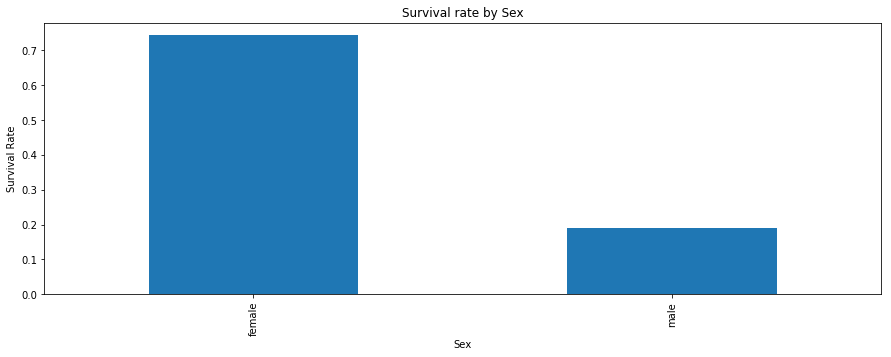

In [39]:
# survival rate by gender
plot_survival_rate('Sex')

looking at the result on the previous cell, we can see that women were much more likely to survive than men, probably this is becasue the crew allowed women and children to board lifeboats first.

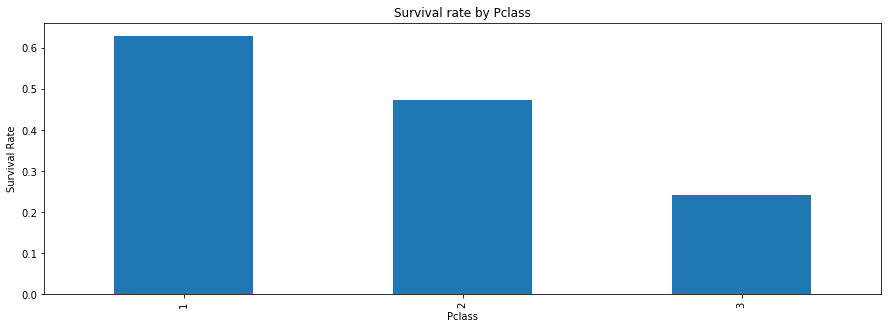

In [34]:
# survival rate by class
plot_survival_rate('Pclass')

we can see that the higher the class the people traveled in, the more likely they were to survive, I think this might be because lifeboats were more near to the cabins from these classes

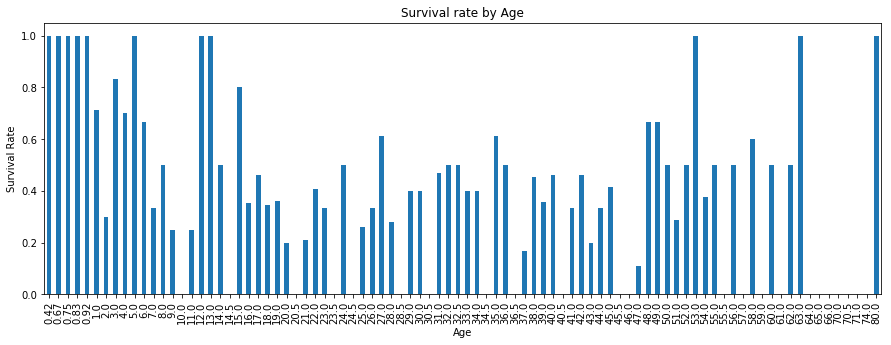

In [35]:
# survival rate by age
plot_survival_rate('Age')

We can see that the age is not in the right format, so we need to convert it to string

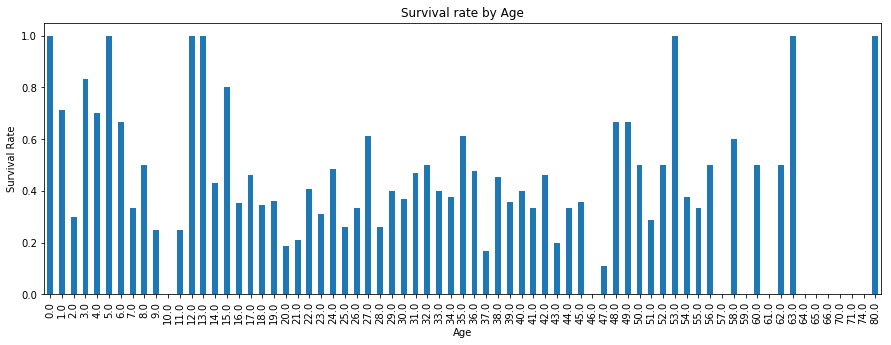

In [36]:

plot_survival_rate('Age')

We might argue that children under 13 years old are more likely to survive, but I think we still have to look deeper

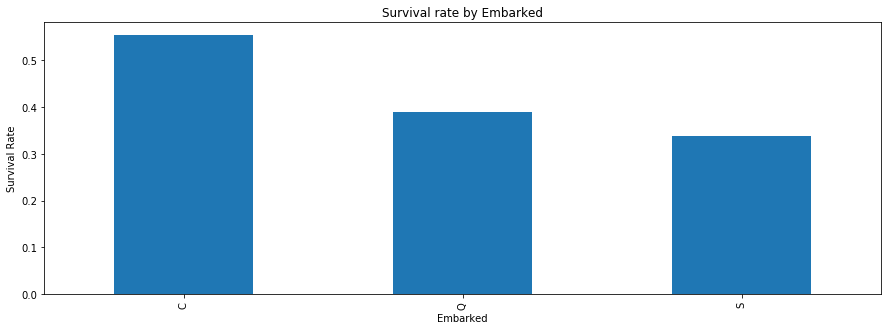

In [37]:
# survival rate by port
plot_survival_rate('Embarked')

We can see that people imbarked in Q is more likely to survive, but this might be related to other variable also,

In [ ]:
# survival rate by ps